In [1]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# creating empty reviews list
oneplus_reviews=[]

In [3]:
for i in range(1,21):
  ip=[]  
  url="https://www.amazon.in/OnePlus-Silver-Storage-hands-free-capable/product-reviews/B09MQBRCSZ/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i)  
  response = requests.get(url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  reviews = soup.find_all("span", attrs={"class","a-size-base review-text review-text-content"})# Extracting the content under specific tags  
  for i in range(len(reviews)):
    ip.append(reviews[i].text)  
 
  oneplus_reviews = oneplus_reviews + ip  # adding the reviews of one page to empty list which in future contains all the reviews

In [4]:
# writng reviews in a text file 
with open("oneplus.txt", "w", encoding='utf8') as output:
    output.write(str(oneplus_reviews))


In [5]:
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(oneplus_reviews)

In [6]:
ip_rev_string

'\nBuilt quality, performance, camera, sound, battery, evrything is top notch\n \nI see no reviews of this phone on Amazon so far. Is mine the First? Looks like not many were interested in this phone after all! :D As usual I end up purchasing not so popular things like I did in 2015 by purchasing Samsung Galaxy S5.I ordered my Oneplus 9RT from Oneplus Store app as soon as it went on sale because there was a small extra discount on old Oneplus phones. It looked like a good deal but when I checked the Amazon website, there were already card offers of about Rs.4000 off using SBI and a few other not so popular cards. I have only HDFC credit card which had no offers.But I still chose to purchase it from Oneplus store because I was getting Rs.500 off on OnePlus Band. I decided to try that too as I own Oneplus Buds Z (See! Getting into the Ecosystem). Another offer was 6 months free Spotify premium (not available to those who completed Spotify free trial or previously purchased Spotify premiu

In [7]:
import nltk
# from nltk.corpus import stopwords


In [8]:
# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+", " ", ip_rev_string).lower()
# ip_rev_string = re.sub("[0-9" "]+"," ", ip_rev_string)

In [9]:
# words that contained in the reviews
ip_reviews_words = ip_rev_string.split(" ")

In [11]:
ip_reviews_words

['built',
 'quality',
 'performance',
 'camera',
 'sound',
 'battery',
 'evrything',
 'is',
 'top',
 'notch',
 'i',
 'see',
 'no',
 'reviews',
 'of',
 'this',
 'phone',
 'on',
 'amazon',
 'so',
 'far',
 'is',
 'mine',
 'the',
 'first',
 'looks',
 'like',
 'not',
 'many',
 'were',
 'interested',
 'in',
 'this',
 'phone',
 'after',
 'all',
 'd',
 'as',
 'usual',
 'i',
 'end',
 'up',
 'purchasing',
 'not',
 'so',
 'popular',
 'things',
 'like',
 'i',
 'did',
 'in',
 'by',
 'purchasing',
 'samsung',
 'galaxy',
 's',
 'i',
 'ordered',
 'my',
 'oneplus',
 'rt',
 'from',
 'oneplus',
 'store',
 'app',
 'as',
 'soon',
 'as',
 'it',
 'went',
 'on',
 'sale',
 'because',
 'there',
 'was',
 'a',
 'small',
 'extra',
 'discount',
 'on',
 'old',
 'oneplus',
 'phones',
 'it',
 'looked',
 'like',
 'a',
 'good',
 'deal',
 'but',
 'when',
 'i',
 'checked',
 'the',
 'amazon',
 'website',
 'there',
 'were',
 'already',
 'card',
 'offers',
 'of',
 'about',
 'rs',
 'off',
 'using',
 'sbi',
 'and',
 'a',
 'few

In [10]:
ip_reviews_words = ip_reviews_words[1:]

In [12]:
#TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True, ngram_range=(1, 1))
X = vectorizer.fit_transform(ip_reviews_words)

In [13]:
with open("E:/TextMining/wordtxt/stop.txt", "r") as sw:
    stop_words = sw.read()

In [14]:
stop_words = stop_words.split("\n")

In [15]:
stop_words

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 'co',
 'com',
 'come',
 'c

In [16]:
stop_words.extend(["oneplus","mobile","time","android","phone","device","product","day"])

In [17]:
ip_reviews_words = [w for w in ip_reviews_words if not w in stop_words]

In [18]:
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(ip_reviews_words)

In [ ]:
# WordCloud can be performed on the string inputs.
# Corpus level word cloud

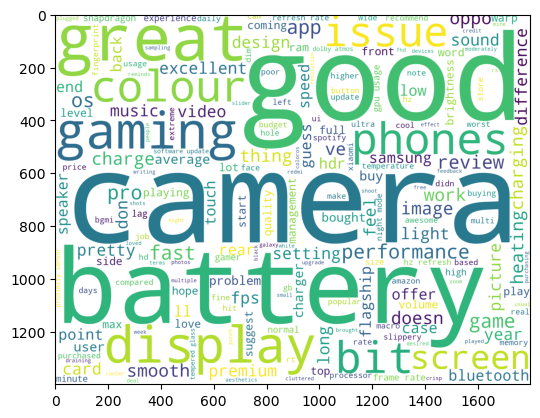

In [19]:
wordcloud_ip = WordCloud(background_color='White',
                      width=1800,
                      height=1400
                     ).generate(ip_rev_string)
plt.imshow(wordcloud_ip)

In [21]:
# positive words # Choose the path for +ve words stored in system
with open("E:/TextMining/wordtxt/positive-words.txt", "r") as pos:
  poswords = pos.read().split("\n")

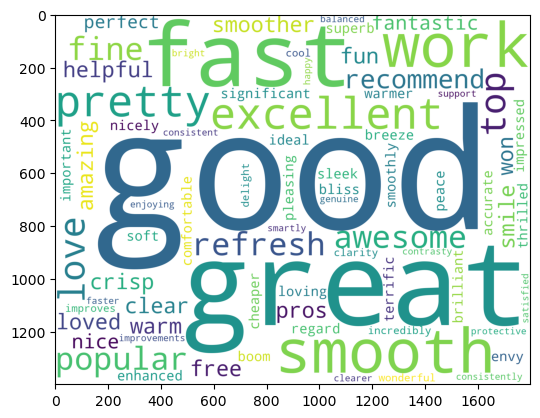

In [22]:
# Positive word cloud
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])

wordcloud_pos_in_pos = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)
plt.figure(2)
plt.imshow(wordcloud_pos_in_pos)

In [23]:
# negative words Choose path for -ve words stored in system
with open("E:/TextMining/wordtxt/negative-words.txt", "r") as neg:
  negwords = neg.read().split("\n")

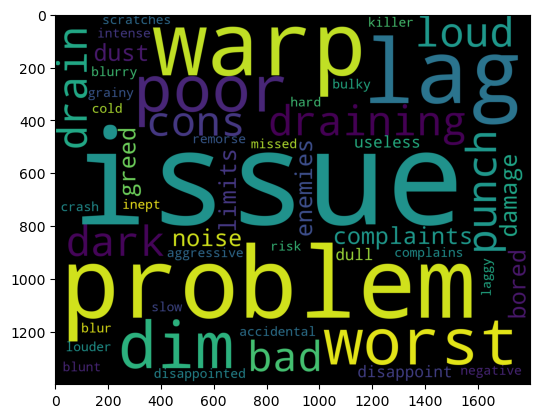

In [24]:
# negative word cloud
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)
plt.figure(3)
plt.imshow(wordcloud_neg_in_neg)